Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [97]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [98]:
X, y_true = make_blobs(n_samples=1500, centers=4, cluster_std=0.60, random_state=0)

In [99]:
class Mini_KMeans:
    def __init__(self,k, replacement=True, batch_size=100, max_iter=100):
        self.k = k
        self.replacement = replacement
        self.batch_size = batch_size
        self.max_iter = max_iter

    def fit(self,X, show_plot = False):
        m, n = X.shape
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:k]
        self.centers=X[i]
        
        for ix in np.arange(self.max_iter):
            random = rng.randint(m)
            X_batch = X[random:random+self.batch_size]
            labels = pairwise_distances_argmin(X_batch, self.centers)
            
            new_centers=[]
            for i in range(self.k):
                new_centers.append(X_batch[labels == i].mean(axis=0))
            new_centers = np.array(new_centers)
            
            if show_plot:
                if (self.max_iter % 5 == 0):
                    pred=pairwise_distances_argmin(X_batch,new_centers)
                    plt.figure(figsize=(5,2))
                    plt.title(f"Iteration:{ix}")
                    plt.scatter(X_batch[:,0],X_batch[:,1],c=pred)
                    plt.scatter(new_centers[:,0],new_centers[:,1],s=100, marker = '*', c="black",alpha=0.6)
                    
            
            if(np.allclose(self.centers, new_centers, rtol=0.2)):
                break
            else:
                self.centers=new_centers
        
        print(f"Done in {ix} iteration")
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers)
        for i in range(self.k):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)**2).sum()
        print("Total with variation score: ", total_with_variation_score)
        
    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)

Done in 3 iteration
Total with variation score:  5806.265978253411
Fit and precit time:0.011951446533203125
Done in 3 iteration
Total with variation score:  3175.0215055926315
Fit and precit time:0.007290363311767578
Done in 3 iteration
Total with variation score:  3060.973639538683
Fit and precit time:0.0071985721588134766
Done in 1 iteration
Total with variation score:  932.2183241238286
Fit and precit time:0.005513668060302734
Done in 1 iteration
Total with variation score:  874.8641756746689
Fit and precit time:0.005677223205566406


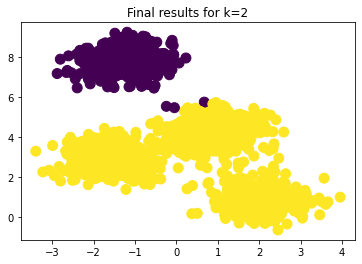

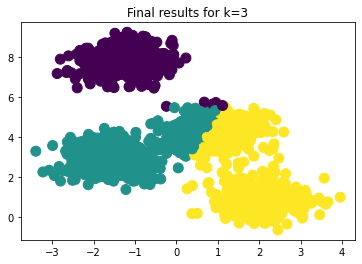

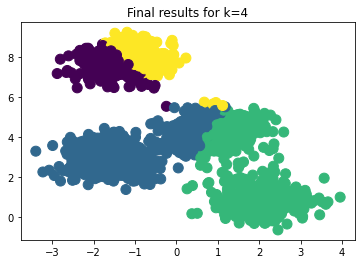

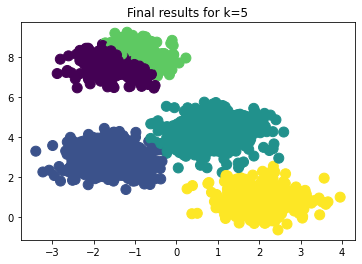

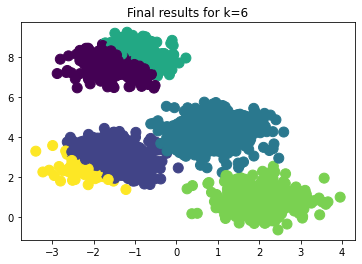

In [100]:
for k in range(2,7):
    start = time()
    model = Mini_KMeans(k)
    model.fit(X)
    preds=model.predict(X,)
    print(f"Fit and precit time:{time()-start}")
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c= preds, s=100)
    plt.title(f"Final results for k={k}")

Done in 3 iteration
Total with variation score:  3060.973639538683


Text(0.5, 1.0, 'Final results for k=4')

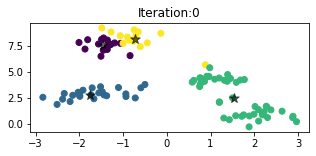

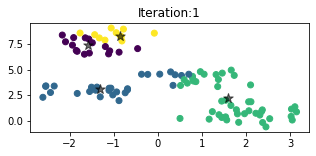

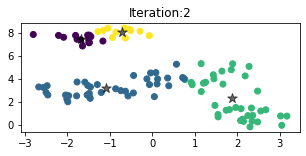

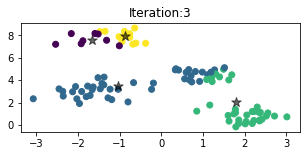

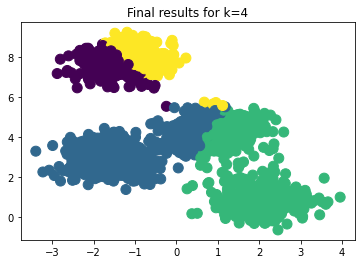

In [101]:
k = 4
model = Mini_KMeans(k)
model.fit(X, show_plot = True)
preds=model.predict(X,)
plt.figure()
plt.scatter(X[:,0], X[:,1], c= preds, s=100)
plt.title(f"Final results for k={k}")